In [7]:
import os
import pandas as pd
import s3fs
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [4]:
DATASET_PATH = "../data/LivingRoom_preprocessed_hack"

## Download Dataset

In [2]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [3]:
# Lister les challenges
fs.ls("gvimont/diffusion/hackathon-minarm-2024")

['gvimont/diffusion/hackathon-minarm-2024/AIVSAI',
 'gvimont/diffusion/hackathon-minarm-2024/Acoustique',
 'gvimont/diffusion/hackathon-minarm-2024/Similarité']

In [4]:
# Lister les fichiers d'un challenge
fs.ls("gvimont/diffusion/hackathon-minarm-2024/Acoustique")

['gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip']

In [5]:
# Télécharger les données dans le service
PATH_IN = 'gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip'
fs.download(PATH_IN, 'data/LivingRoom_preprocessed_hack.zip')

[None]

In [6]:
# Décompresser les données
with zipfile.ZipFile("data/LivingRoom_preprocessed_hack.zip","r") as zip_file:
    zip_file.extractall("data/")

## Read Data

In [5]:
centroids = np.load(DATASET_PATH + "/Human1/centroid.npy")
deconvoled_trim = np.load(DATASET_PATH + "/Human1/deconvoled_trim.npy")
skeletons = np.load(DATASET_PATH + "/Human1/skeletons.npy")

In [11]:
print("Skeletons Shape: ", skeletons.shape)
print("Deconvoled Trim Shape: ", deconvoled_trim.shape)
print("Centroids Shape: ", centroids.shape)

Skeletons Shape:  (1000, 3, 32, 3)
Deconvoled Trim Shape:  (1000, 4, 667200)
Centroids Shape:  (1000, 2)


In [6]:
df_centroid = pd.DataFrame(centroids, columns=['x', 'y '])
df_centroid

,x,y
0,-3231.329347,-1127.877715
1,-3198.541079,-744.510066
2,-3192.977627,-248.266788
3,-3018.418253,334.938546
4,-3015.779532,826.440201
...,...,...
995,-2232.655302,-3227.790684
996,-2230.893046,-2974.853017
997,-1717.899236,-3166.596485
998,-1808.603375,-2779.130384


## Visualize Data

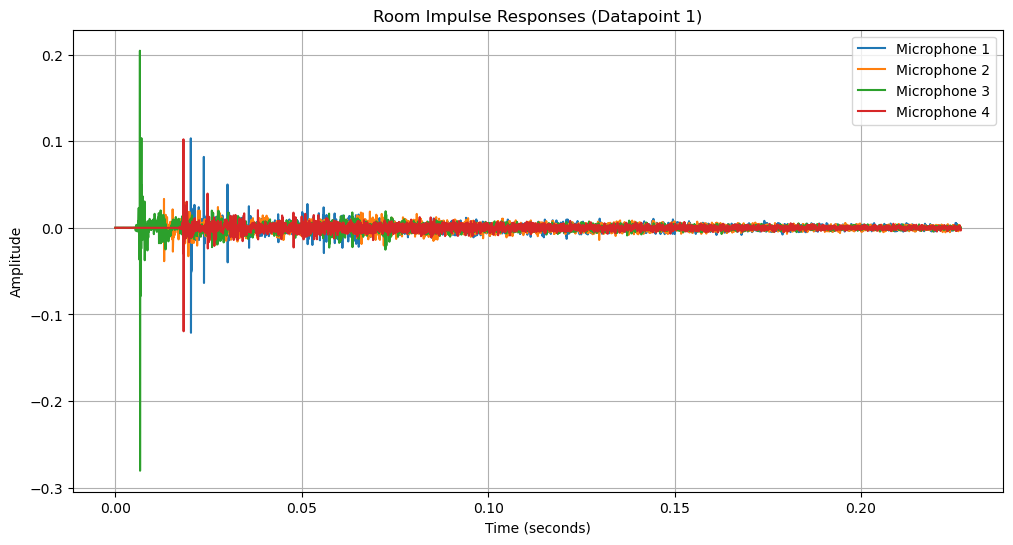

In [10]:
# Assuming deconvoled_trim is already loaded and has shape [N_datapoints, N_Microphones, N_samples]
N_datapoints, N_Microphones, N_samples = deconvoled_trim.shape

# Choose a specific datapoint and time sample range to plot
datapoint_index = 1  # Choose the datapoint index
time_sample_start = 0  # Start index of time samples
time_sample_end = 10000  # End index of time samples (or choose a specific range)

# Create a time axis for plotting (assuming sampling rate of the RIRs is known)
sampling_rate = 44100  # Example sampling rate (adjust based on your data)
time_axis = np.arange(time_sample_end - time_sample_start) / sampling_rate

# Plot the RIRs for each microphone channel
plt.figure(figsize=(12, 6))
for microphone_index in range(N_Microphones):
    # Extract the RIR for the current microphone channel
    rir = deconvoled_trim[datapoint_index, microphone_index, time_sample_start:time_sample_end]
    
    # Plot the RIR on the same figure with different colors for each microphone
    plt.plot(time_axis, rir, label=f"Microphone {microphone_index + 1}")

plt.title(f"Room Impulse Responses (Datapoint {datapoint_index})")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


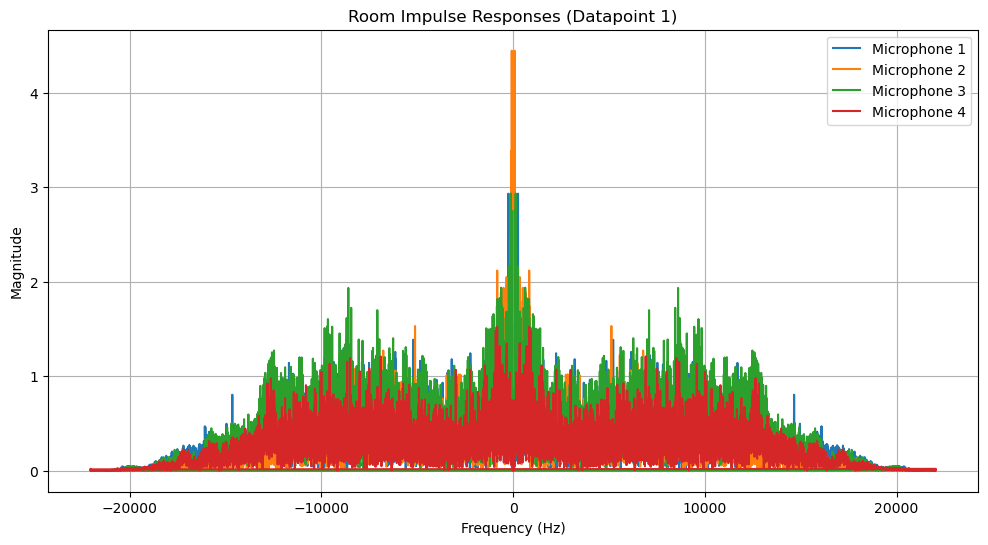

In [12]:
# Plot the RIRs for each microphone channel in the frequency domain
plt.figure(figsize=(12, 6))
for microphone_index in range(N_Microphones):
    # Extract the RIR for the current microphone channel
    rir = deconvoled_trim[datapoint_index, microphone_index, time_sample_start:time_sample_end]
    
    # Compute the FFT
    rir_fft = np.fft.fft(rir)
    
    # Compute the frequency axis
    freq_axis = np.fft.fftfreq(len(rir), 1 / sampling_rate)
    
    # Plot the magnitude of the FFT (absolute value)
    plt.plot(freq_axis, np.abs(rir_fft), label=f"Microphone {microphone_index + 1}")

plt.title(f"Room Impulse Responses (Datapoint {datapoint_index})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()